# Loading the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('/home/irma/Dropbox/Documents/Work/Research/Sabina_collab/Video_QoE_Modeling/processed_data/complete/Processed_Video_QoE_Modeling.csv')
df.head()

,Osoba,God,NM_Spol,StepenObrazovanja,PrethodnoIskustvo,Naocale,Sluh,Ruka,Emocije,Lokacija,...,P4.4,P4.5,P4.6,P4.7,P4_AVG,Dan,Mjesec,Godina,Tip_dana,Dio_dana
0,1,48,1,3,4,1,2,2,1,1,...,4,4,5,5.0,4.571429,4,5,2017,weekday,evening
1,1,48,1,3,4,1,2,2,1,1,...,4,4,5,5.0,4.571429,4,5,2017,weekday,evening
2,1,48,1,3,4,1,2,2,1,1,...,4,4,5,5.0,4.571429,4,5,2017,weekday,evening
3,1,48,1,3,4,1,2,2,1,1,...,4,4,5,5.0,4.571429,4,5,2017,weekday,evening
4,1,48,1,3,4,1,2,2,1,1,...,4,4,5,5.0,4.571429,4,5,2017,weekday,evening


# Data Analysis


## Age analysis

3.2140207715133533 1.0827557117345448
3.2221810089020773 1.068335548600532
3.3372721492157686 0.9094967983028546
4.297742687579484 0.824439678069673
End group 1
3.215 1.0819527025658424
3.2239285714285715 1.0636406679058164
3.341122448979591 0.9079145772466398
4.308316326530617 0.8160361641443544
End group 3
3.2315227070347285 1.0754511135051381
3.239240130602553 1.0561960122303524
3.3442451483413196 0.9114091157193133
4.3232483851361945 0.8015322512488273
End group 3


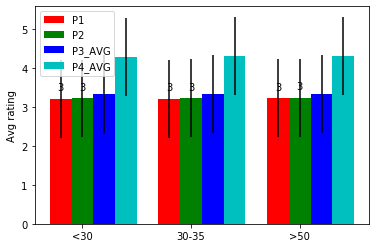

In [7]:
def agegroup(row):
    try:
        if (int(row.God) < 30):
            return '<30'
        if (int(row.God) <=30) and(int(row.God) < 50) :
            return "30-50"
        else:
            return ">50"
    except:
        return

df = pd.read_csv('/home/irma/Dropbox/Documents/Work/Research/Sabina_collab/Video_QoE_Modeling/processed_data/complete/Processed_Video_QoE_Modeling.csv')
P1Code = {1: 'Loša', 2: 'Slaba', 3: 'Umjerena', 4: 'Dobra', 5: 'Odlicna'}
P234Code = {1: 'uopće se ne slažem', 2: 'ne slažem se', 3: 'nemam mišljenje', 4: 'slažem se', 5: 'potpuno se slažem'}


#Looking into the average ratings for three age groups
group1 = df.loc[df['God'] < 30] 
group1mean = group1.mean(axis = 0)
group1std = group1.std(axis = 0)
print(group1mean.P1, group1std.P1)
print(group1mean.P2, group1std.P2)
print(group1mean.P3_AVG, group1std.P3_AVG)
print(group1mean.P4_AVG, group1std.P4_AVG)
print("End group 1")

group2 = df.loc[(df['God'] <= 30) & (df['God'] < 50)] 
group2mean = group2.mean(axis = 0)
group2std = group2.std(axis = 0)
print(group2mean.P1, group2std.P1)
print(group2mean.P2, group2std.P2)
print(group2mean.P3_AVG, group2std.P3_AVG)
print(group2mean.P4_AVG, group2std.P4_AVG)
print("End group 3")

group3 = df.loc[df['God'] < 50] 
group3mean = group3.mean(axis = 0)
group3std = group3.std(axis = 0)
print(group3mean.P1, group3std.P1)
print(group3mean.P2, group3std.P2)
print(group3mean.P3_AVG, group3std.P3_AVG)
print(group3mean.P4_AVG, group3std.P4_AVG)
print("End group 3")
N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.2       # the width of the bars




fig = plt.figure()
ax = fig.add_subplot(111)
rects1 = ax.bar(ind, [group1mean.P1, group2mean.P1, group3mean.P1], width, yerr = [1,1,1], color='r')
rects2 = ax.bar(ind + width, [group1mean.P2, group2mean.P2, group3mean.P2], width, yerr = [1,1,1], color='g')
rects3 = ax.bar(ind+2*width, [group1mean.P3_AVG, group2mean.P3_AVG, group3mean.P3_AVG], width, yerr = [1,1,1], color='b')
rects4 = ax.bar(ind+width*3, [group1mean.P4_AVG, group2mean.P4_AVG, group3mean.P4_AVG], width, yerr = [1,1,1], color='c')


ax.set_ylabel('Avg rating')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('<30', '30-35', '>50') )
ax.legend( (rects1[0], rects2[0], rects3[0], rects4[0]), ('P1', 'P2', 'P3_AVG', 'P4_AVG') )

def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.05*h, '%d'%int(h),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

What is noticeable is that there is no observable difference in responses across the age groups. In all age groups P4_AVG seems to be getting a higher rating than other questions.

# Proportion of interviewees from two genders (female and male) given their previous experience (PrethodnoIskustvo) 

First we will see what the distributions are on certain attributes. The first plot below shows the distribution of people with previous experience of using streaming data (PrethodnoIskustvo). 

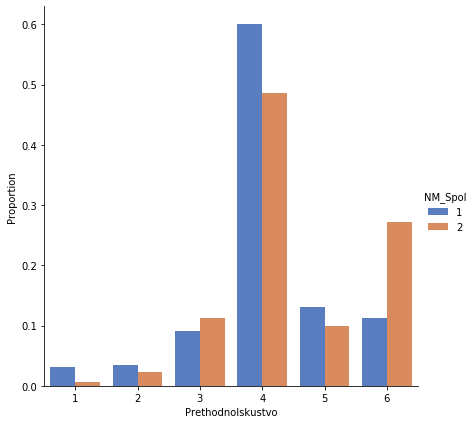

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


x, y, hue = "PrethodnoIskustvo", "Proportion", "NM_Spol"
df2 = df.groupby(['NM_Spol', 'PrethodnoIskustvo']).size().reset_index(name='gender_count')
s = df.NM_Spol.value_counts()
df2['Proportion'] = df2['gender_count'].div(df2['NM_Spol'].map(s))
g = sns.catplot(x="PrethodnoIskustvo", y="Proportion", hue="NM_Spol", data=df2,
                height=6, kind="bar", palette="muted")


We see that the majority of the interviewees fall into level 4 experience (~60% of men and ~49% of women). The second largest group is experience level 6 (11% of men and 27% women).

# Relationship between P4_AVG and some other variables

## Relationship between P4_AVG and PrethodnoIskustvo

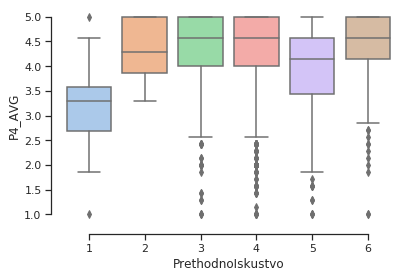

In [121]:
import seaborn as sns

sns.set(style="ticks", palette="pastel")

sns.boxplot(x="PrethodnoIskustvo", y="P4_AVG",
            data=df)
sns.despine(offset=10, trim=True)

It is noticeable that the first group of previous experience (Group 1: "Jednom mjesečno") usually gives a lower rating than other groups. (Rating 3 means the person didn't have a particular opinion on some question from group P4). The first two groups don't have as much outliers as groups 3, 4, 5, and 6. This might indicate that people with higher experience are both experienced and didn't have difficulties using the application, but that they also tend to be more critical and give lower extreme lower ratings (hence the outliers). Groups 3, 4 and 6 have very similar responses with group 6 having slightly less variability. 

## Relationship between P4_AVG and age groups

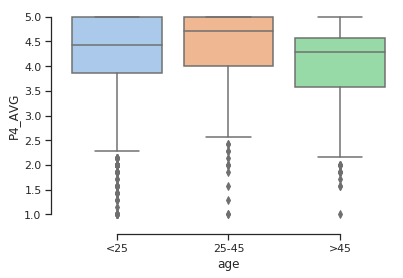

In [75]:
newDF = pd.DataFrame()
bin_labels_3 = ['<25', '25-45', '>45']

#binning age into three categories
newDF['age'] = pd.cut(df['God'],[0, 25 , 45, 100], labels = bin_labels_3)
newDF['P4_AVG'] = df['P4_AVG']

#group by age
newDF.groupby("age")["P4_AVG"]
sns.set(style="ticks", palette="pastel")

sns.boxplot(x="age", y="P4_AVG",
            data=newDF)
sns.despine(offset=10, trim=True)




The youngest age group seems to be evenly distributed about their rating, but still have quite some outliers. For Age groups 25-45 and >45 even though the median rating is rather high, the distribution is more skewed with the majority rating values falling in the lower tange.

## Relationship between P4_AVG and emotion

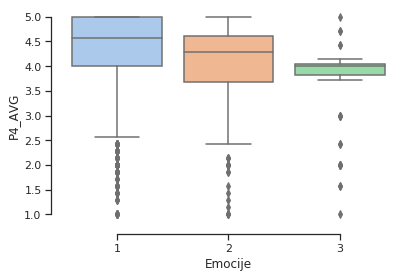

In [80]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Emocije", y="P4_AVG",
            data=df)
sns.despine(offset=10, trim=True)

In [ ]:
It is noticeable that the Emotion 3 ("Ostalo") has a rather agreeable result on P4_AVG

## Relationship between P4_AVG and Location

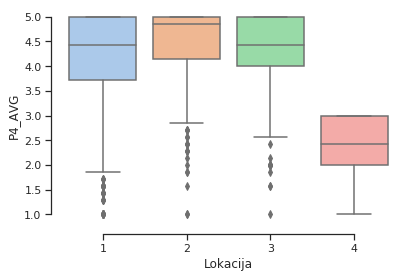

In [82]:
sns.set(style="ticks", palette="pastel")
sns.boxplot(x="Lokacija", y="P4_AVG",
            data=df)
sns.despine(offset=10, trim=True)

It seems that the location of Hotel (group 4) has on average low P4_AVG rating. Let us see what values other variables have given that the location is a hotel (4).

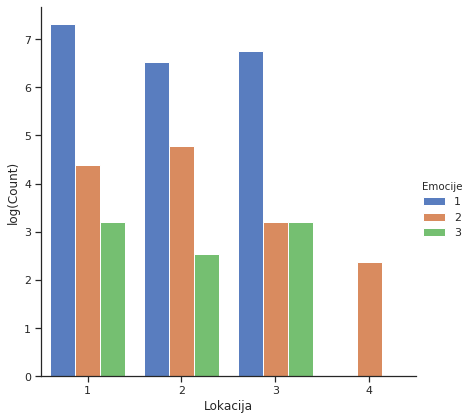

In [120]:
grouped = df.groupby(['Lokacija'])
hotel_group = grouped.get_group(4)
emotions = hotel_group["Emocije"]
guzva = hotel_group['Guzva']
buka = hotel_group['Buka']
osvjetljeno = hotel_group['Osvjetljeno']
sluh = hotel_group['Sluh']
bitrate = hotel_group['bitrate']

#histogram of emotion vs location
x, y,  = "Emocije", "Broj osoba"
df2 = df.groupby(['Lokacija', 'Emocije']).size().reset_index(name='emotion_count')
s = np.log(df2.Emocije.value_counts())
df2['log(Count)'] = np.log(df2['emotion_count'].div(df2['Emocije'].map(s)))
g = sns.catplot(x="Lokacija", y="log(Count)", hue="Emocije", data=df2,
                height=6, kind="bar", palette="muted")

#histogram of guzva (crowd) vs location
x, y,  = "Emocije", "Broj osoba"
df2 = df.groupby(['Lokacija', 'Emocije']).size().reset_index(name='emotion_count')
s = np.log(df2.Emocije.value_counts())
df2['log(Count)'] = np.log(df2['emotion_count'].div(df2['Emocije'].map(s)))
g = sns.catplot(x="Lokacija", y="log(Count)", hue="Emocije", data=df2,
                height=6, kind="bar", palette="muted")



Hotel location (4) has only 15 respondents and all of them marked their emotion as 2 ("Neraspolozen"). :D